In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

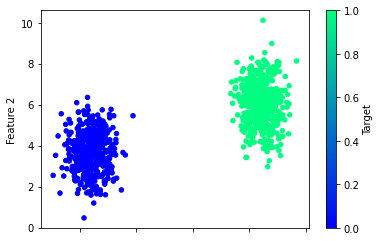

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

# Note that the number of parameters in each layer does not equal the number of neurons we defined in the notebook

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Now that we have our layers defined, we have to inform the model how it should train using the input data. The process of informing the model how it should learn and train is called compiling the model.
# Neural network using a specific optimization function and loss metric. The optimization function shapes and molds a neural network model while it is being trained to ensure that it performs to the best of its ability. The loss metric is used by machine learning algorithms to score the performance of the model through each iteration and epoch by evaluating the inaccuracy of a single input.

In [10]:
# loss metric Measures how poorly a model characterizes the data after each iteration.	
# evaluation metric Measures the quality of a machine learning model.
# optimization function Improves the performance of a machine learning algorithm.
# activation function Adds an additional step at each layer.

# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

In [11]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [12]:
# Fit the model to the training data
# # Fit the model to the training data
# Looking at the model training output, we know that the loss metric was 0.07 and the predictive accuracy is 1.0
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.5473 - accuracy: 1.0000
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5240 - accuracy: 1.0000
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5192 - accuracy: 1.0000
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4929 - accuracy: 1.0000
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4829 - accuracy: 1.0000
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 1.0000
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4591 - accuracy: 1.0000
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4432 - accuracy: 1.0000
Epoch 9/100
24/24 [==============================] - 0s 4ms/step - loss: 0.4082 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4148 - accuracy: 1.0000
Epoch 11/

24/24 [==============================] - 0s 5ms/step - loss: 0.0906 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0882 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0878 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0838 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0849 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0838 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0842 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0825 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0766 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0796 - accuracy: 1.0000
Epoch 92/100


<AxesSubplot:>

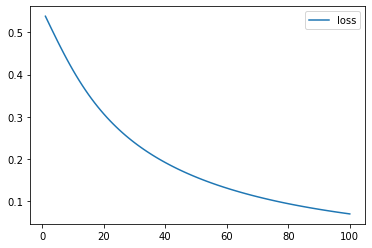

In [13]:
# When training completes, the model object stores the loss and accuracy metrics across all epochs
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

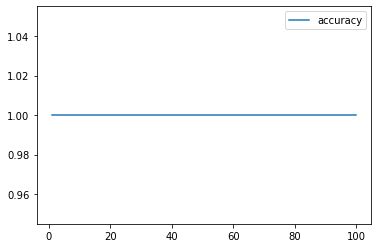

In [14]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0653 - accuracy: 1.0000
Loss: 0.06525643914937973, Accuracy: 1.0


In [16]:
# Looking at the performance metrics from the model, the neural network was able to correctly classify each of the points in the test data. In other words, the model was able to correctly classify data it was not trained on 100% of the time. 

# Therefore, it is important to establish model performance thresholds before designing any machine learning model.

# Depending on the type of data and the use case, we may have to recreate and retrain a model using different parameters, different training/test data, or even look to use a different model entirely.

In [17]:
# Now that we have a trained neural network model and we have verified its performance using a test dataset, we can apply this model to novel datasets and predict the classification of a data poin
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

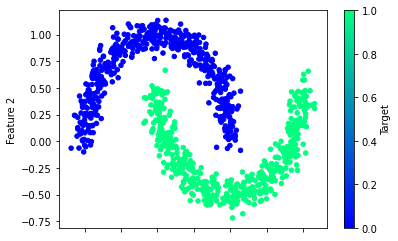

In [18]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [19]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [20]:
# Just as we did with the linear data, we'll train our neural network model using the fit method on the nonlinear training data.

# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.9704 - accuracy: 0.5320
Epoch 2/100
24/24 [==============================] - 0s 5ms/step - loss: 0.8468 - accuracy: 0.5600
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7673 - accuracy: 0.5880
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 0.7127 - accuracy: 0.6080
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6730 - accuracy: 0.6227
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6411 - accuracy: 0.6347
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6152 - accuracy: 0.6453
Epoch 8/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5925 - accuracy: 0.6613
Epoch 9/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5714 - accuracy: 0.6720
Epoch 10/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5522 - accuracy: 0.6853
Epoch 11/

24/24 [==============================] - 0s 3ms/step - loss: 0.2656 - accuracy: 0.8933
Epoch 83/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2651 - accuracy: 0.8933
Epoch 84/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2647 - accuracy: 0.8920
Epoch 85/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2643 - accuracy: 0.8920
Epoch 86/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2640 - accuracy: 0.8920
Epoch 87/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2636 - accuracy: 0.8920
Epoch 88/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2633 - accuracy: 0.8907
Epoch 89/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2629 - accuracy: 0.8907
Epoch 90/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2626 - accuracy: 0.8907
Epoch 91/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2624 - accuracy: 0.8907
Epoch 92/100


<AxesSubplot:>

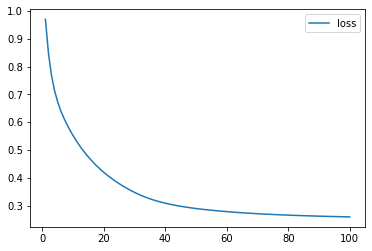

In [21]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

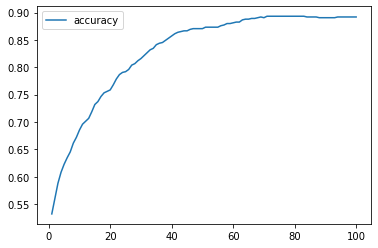

In [22]:
# Plot the loss
history_df.plot(y="accuracy")

In [23]:
# So, if adding more neurons to our neural network model increases the performance, why wouldn't we always use the maximum number of neurons? There are two main reasons to limit the number of neurons in a neural network model: overfitting and computation resources.

# A good rule of thumb for a basic neural network is to have two to three times the amount of neurons in the hidden layer as the number of inputs.

In [24]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [25]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [26]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.9524 - accuracy: 0.1570
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 0.8853 - accuracy: 0.1674
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8312 - accuracy: 0.2184
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 0.7836 - accuracy: 0.3129
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7396 - accuracy: 0.3758
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7169 - accuracy: 0.4193
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6833 - accuracy: 0.4666
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6584 - accuracy: 0.4726
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6469 - accuracy: 0.4614
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6279 - accuracy: 0.4883
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.2299 - accuracy: 0.9070
Epoch 84/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2096 - accuracy: 0.9127
Epoch 85/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2473 - accuracy: 0.8997
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2254 - accuracy: 0.9046
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2159 - accuracy: 0.9137
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2361 - accuracy: 0.8975
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2230 - accuracy: 0.9034
Epoch 90/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2385 - accuracy: 0.8947
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2174 - accuracy: 0.9162
Epoch 92/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2302 - accuracy: 0.9090
Epoch 93/100


In [27]:
#  When a neural network model does not meet performance expectations, it is usually due to one of two causes: inadequate or inappropriate model design for a given dataset, or insufficient or ineffective training data.

In [28]:
# Optimization neural network
# Check out your input dataset.
# Add more neurons to a hidden layer.
# Add additional hidden layers.
# Use a different activation function for the hidden layers.
# Add additional epochs to the training regimen.

In [29]:
# The sigmoid function values are normalized to a probability between 0 and 1, which is ideal for binary classification.
# The tanh function can be used for classification or regression, and it expands the range between -1 and 1.
# The ReLU function is ideal for looking at positive nonlinear input data for classification or regression.
# The Leaky ReLU function is a good alternative for nonlinear input data with many negative inputs.

In [30]:
# Dataset: https://2u-data-curriculum-team.s3.amazonaws.com/dataviz-online/module_19/ramen-ratings.csv
# Dataset: https://2u-data-curriculum-team.s3.amazonaws.com/dataviz-online/module_19/ramen-ratings.csv# 

In [31]:
# Import our dependencies
import pandas as pd
import sklearn as skl

# Read in our ramen data
ramen_df = pd.read_csv("ramen-ratings.csv")

# Print out the Country value counts
country_counts = ramen_df.Country.value_counts()
country_counts

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Nepal             14
Myanmar           14
Hungary            9
Pakistan           9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Holland            4
Poland             4
Fiji               4
Sarawak            3
Finland            3
Dubai              3
Sweden             3
Ghana              2
Estonia            2
United States      1
Nigeria            1
Name: Country, dtype: int64

<AxesSubplot:ylabel='Density'>

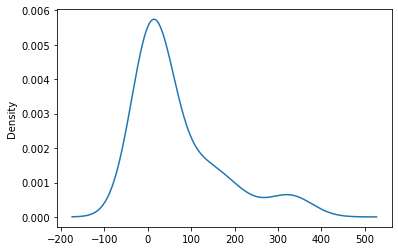

In [32]:
# Visualize the value counts
# The most straightforward method is to use a density plot to identify where the value counts "fall off" and set the threshold within this region. 
country_counts.plot.density()

In [33]:
# Determine which values to replace
replace_countries = list(country_counts[country_counts < 100].index)

# Replace in DataFrame
for country in replace_countries:
    ramen_df.Country = ramen_df.Country.replace(country,"Other")


# Check to make sure binning was successful
ramen_df.Country.value_counts()

Other          376
Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
Name: Country, dtype: int64

In [34]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(ramen_df.Country.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['Country'])
encode_df.head()

,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Merge the two DataFrames together and drop the Country column
ramen_df.merge(encode_df,left_index=True,right_index=True).drop("Country",1)

,Review #,Brand,Variety,Style,Stars,Top Ten,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,2580,New Touch,T's Restaurant Tantanmen,Cup,3.75,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,2.25,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,2.75,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2576,Ching's Secret,Singapore Curry,Pack,3.75,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,3.5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [36]:
# https://2u-data-curriculum-team.s3.amazonaws.com/dataviz-online/module_19/hr_dataset.csv

In [37]:
# Import our dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read in our dataset
hr_df = pd.read_csv("hr_dataset.csv")
hr_df.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,0.30,1,253,2
1,0.25,1,200,0
2,0.90,4,2880,5
3,0.65,3,1450,3
4,0.50,2,785,2


In [38]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [39]:
# Fit the StandardScaler
scaler.fit(hr_df)

# Scale the data
scaled_data = scaler.transform(hr_df)

In [40]:
# Create a DataFrame with the scaled data
transformed_scaled_data = pd.DataFrame(scaled_data, columns=hr_df.columns)
transformed_scaled_data.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,-1.303615,-1.162476,-1.049481,-0.558656
1,-1.512945,-1.162476,-1.094603,-1.804887
2,1.208335,0.860233,1.187080,1.310692
3,0.161689,0.185996,-0.030385,0.064460
4,-0.466299,-0.488240,-0.596549,-0.558656


In [41]:
# To address the limitations of the basic neural network, we can implement a more robust neural network model by adding additional hidden layers. A neural network with more than one hidden layer is known as a deep neural network:

In [42]:
# Looking at the results of our simulated deep learning model, it does not appear that adding more layers increased the overall performance of the model. This is because the additional layer was redundant—the complexity of the dataset was encapsulated within the two hidden layer.
# The only way to determine how "deep" the deep learning model should be is through trial and error. 

In [43]:
# DS: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
attrition_df = pd.read_csv('HR-Employee-Attrition.csv')
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [44]:
# Generate our categorical variable list
attrition_cat = attrition_df.dtypes[attrition_df.dtypes == "object"].index.tolist()

In [45]:
# Check the number of unique values in each column
attrition_df[attrition_cat].nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [46]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(attrition_df[attrition_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(attrition_cat)
encode_df.head()

,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [47]:
# Merge one-hot encoded features and drop the originals
attrition_df = attrition_df.merge(encode_df,left_index=True, right_index=True)
attrition_df = attrition_df.drop(attrition_cat,1)
attrition_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,49,279,8,1,1,2,3,61,2,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,37,1373,2,2,1,4,4,92,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,33,1392,3,4,1,5,4,56,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,27,591,2,1,1,7,1,40,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [48]:
# We need to split our training and testing data before fitting our StandardScaler instance. This prevents testing data from influencing the standardization function.

In [49]:
# Split our preprocessed data into our features and target arrays
y = attrition_df["Attrition_Yes"].values
X = attrition_df.drop(["Attrition_Yes","Attrition_No"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [50]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [51]:
# Now that our data is preprocessed via one-hot encoding and standardization, we should probably perform a gut check to ensure that no data has been lost from our original DataFrame.

In [52]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 448       
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6         
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [54]:
# Training and evaluating the deep learning model is no different from a basic neural network.

In [55]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
35/35 [==============================] - 1s 2ms/step - loss: 69.4288 - accuracy: 0.7285
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 15.9418 - accuracy: 0.6800
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 9.4110 - accuracy: 0.6475
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 7.8278 - accuracy: 0.7127
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 6.0563 - accuracy: 0.6599
Epoch 6/100
35/35 [==============================] - 0s 4ms/step - loss: 5.7975 - accuracy: 0.6799
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 5.9121 - accuracy: 0.7646
Epoch 8/100
35/35 [==============================] - 0s 2ms/step - loss: 4.6168 - accuracy: 0.7288
Epoch 9/100
35/35 [==============================] - 0s 2ms/step - loss: 3.8749 - accuracy: 0.7452
Epoch 10/100
35/35 [==============================] - 0s 2ms/step - loss: 3.6420 - accuracy: 0.7724
Epoch 1

Epoch 83/100
35/35 [==============================] - 0s 2ms/step - loss: 0.6315 - accuracy: 0.7836
Epoch 84/100
35/35 [==============================] - 0s 3ms/step - loss: 0.8786 - accuracy: 0.7721
Epoch 85/100
35/35 [==============================] - 0s 2ms/step - loss: 1.5045 - accuracy: 0.7697
Epoch 86/100
35/35 [==============================] - 0s 2ms/step - loss: 1.3725 - accuracy: 0.7211
Epoch 87/100
35/35 [==============================] - 0s 2ms/step - loss: 0.7352 - accuracy: 0.7905
Epoch 88/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4917 - accuracy: 0.8255
Epoch 89/100
35/35 [==============================] - 0s 4ms/step - loss: 0.9552 - accuracy: 0.8021
Epoch 90/100
35/35 [==============================] - 0s 2ms/step - loss: 0.9368 - accuracy: 0.7509
Epoch 91/100
35/35 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.8288
Epoch 92/100
35/35 [==============================] - 0s 2ms/step - loss: 0.7200 - accuracy: 0.7605


In [56]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

12/12 - 0s - loss: 0.6117 - accuracy: 0.8179
Loss: 0.6116653680801392, Accuracy: 0.8179348111152649


In [57]:
# https://2u-data-curriculum-team.s3.amazonaws.com/dataviz-online/module_19/diabetes.csv

In [58]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

# Import our input dataset
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
# Remove diabetes outcome target from features data
y = diabetes_df.Outcome
X = diabetes_df.drop(columns="Outcome")

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [60]:
# Preprocess numerical data for neural network

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [61]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")


 Logistic regression model accuracy: 0.729


In [62]:
# Define the basic neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=8))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
18/18 [==============================] - 1s 2ms/step - loss: 0.5929 - accuracy: 0.6993
Epoch 2/50
18/18 [==============================] - 0s 3ms/step - loss: 0.5712 - accuracy: 0.7178
Epoch 3/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5631 - accuracy: 0.7403
Epoch 4/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5430 - accuracy: 0.7356
Epoch 5/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5120 - accuracy: 0.7725
Epoch 6/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5378 - accuracy: 0.7165
Epoch 7/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5204 - accuracy: 0.7453
Epoch 8/50
18/18 [==============================] - 0s 2ms/step - loss: 0.4805 - accuracy: 0.7759
Epoch 9/50
18/18 [==============================] - 0s 4ms/step - loss: 0.4830 - accuracy: 0.7792
Epoch 10/50
18/18 [==============================] - 0s 2ms/step - loss: 0.4755 - accuracy: 0.7744
Epoch 11/50
18/18 [

In [63]:
# https://2u-data-curriculum-team.s3.amazonaws.com/dataviz-online/module_19/bank_telemarketing.csv

In [64]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import pandas as pd
import tensorflow as tf

# Import our input dataset
tele_df = pd.read_csv('bank_telemarketing.csv')
tele_df.head()

,Age,Job,Marital_Status,Education,Default_Credit,Housing_Loan,Personal_Loan,Subscribed
0,56,other,married,Primary_Education,no,no,no,no
1,37,services,married,Secondary_Education,no,yes,no,no
2,40,admin,married,Primary_Education,no,no,no,no
3,56,services,married,Secondary_Education,no,no,yes,no
4,59,admin,married,Professional_Education,no,no,no,no


In [65]:
# Generate our categorical variable list
tele_cat = tele_df.dtypes[tele_df.dtypes == "object"].index.tolist()


# Check the number of unique values in each column
tele_df[tele_cat].nunique()

Job               9
Marital_Status    3
Education         4
Default_Credit    2
Housing_Loan      2
Personal_Loan     2
Subscribed        2
dtype: int64

In [66]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(tele_df[tele_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(tele_cat)
encode_df.head()

,Job_admin,Job_blue-collar,Job_entrepreneur,Job_management,Job_other,Job_retired,Job_self-employed,Job_services,Job_technician,Marital_Status_divorced,...,Education_Secondary_Education,Education_Tertiary_Education,Default_Credit_no,Default_Credit_yes,Housing_Loan_no,Housing_Loan_yes,Personal_Loan_no,Personal_Loan_yes,Subscribed_no,Subscribed_yes
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [67]:
# Merge one-hot encoded features and drop the originals
tele_df = tele_df.merge(encode_df,left_index=True, right_index=True)
tele_df = tele_df.drop(tele_cat,1)
tele_df.head()

,Age,Job_admin,Job_blue-collar,Job_entrepreneur,Job_management,Job_other,Job_retired,Job_self-employed,Job_services,Job_technician,...,Education_Secondary_Education,Education_Tertiary_Education,Default_Credit_no,Default_Credit_yes,Housing_Loan_no,Housing_Loan_yes,Personal_Loan_no,Personal_Loan_yes,Subscribed_no,Subscribed_yes
0,56,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,59,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [68]:
# Remove loan status target from features data
y = tele_df.Subscribed_yes.values
X = tele_df.drop(columns=["Subscribed_no","Subscribed_yes"]).values

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [69]:
# Create the SVM model
svm = SVC(kernel='linear')

In [70]:
# Train the model
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [71]:
# Evaluate the model
y_pred = svm.predict(X_test_scaled)
print(f" SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 SVM model accuracy: 0.873


In [72]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  10
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [73]:
# Train the model 
fit_model = nn.fit(X_train_scaled, y_train, epochs=50) 
# Evaluate the model using the test data 
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
715/715 [==============================] - 2s 2ms/step - loss: 0.5669 - accuracy: 0.7207
Epoch 2/50
715/715 [==============================] - 1s 2ms/step - loss: 0.3732 - accuracy: 0.8720
Epoch 3/50
715/715 [==============================] - 2s 2ms/step - loss: 0.3653 - accuracy: 0.8757
Epoch 4/50
715/715 [==============================] - 1s 2ms/step - loss: 0.3747 - accuracy: 0.8695
Epoch 5/50
715/715 [==============================] - 2s 2ms/step - loss: 0.3679 - accuracy: 0.8747
Epoch 6/50
715/715 [==============================] - 2s 2ms/step - loss: 0.3661 - accuracy: 0.8743
Epoch 7/50
715/715 [==============================] - 1s 2ms/step - loss: 0.3623 - accuracy: 0.8746: 0s - loss: 0.3614 - 
Epoch 8/50
715/715 [==============================] - 2s 3ms/step - loss: 0.3711 - accuracy: 0.8706: 0s - loss: 0.3712 - accuracy: 0.
Epoch 9/50
715/715 [==============================] - 1s 2ms/step - loss: 0.3638 - accuracy: 0.8743
Epoch 10/50
715/715 [=======================

In [74]:
# Random forest classifiers are one of Bek's favorites. (Not only is it a powerful model type, she can't help thinking about actual forests when she sees the name!) She's curious how it stacks up against a deep learning model.
# Random forest classifiers are a type of ensemble learning model that combines multiple smaller models into a more robust and accurate model.
# Random forest models use a number of weak learner algorithms (decision trees) and combine their output to make a final classification (or regression) decision

In [75]:
# If random forest models are fairly robust and clear, why would you want to replace them with a neural network?

# The answer depends on the type and complexity of the entire dataset. First and foremost, random forest models will only handle tabular data, so data such as images or natural language data cannot be used in a random forest without heavy modifications to the data. Neural networks can handle all sorts of data types and structures in raw format or with general transformations (such as converting categorical data).

# In addition, each model handles input data differently. Random forest models are dependent on each weak learner being trained on a subset of the input data. Once each weak learner is trained, the random forest model predicts the classification based on a consensus of the weak learners. In contrast, deep learning models evaluate input data within a single neuron, as well as across multiple neurons and layers.

# As a result, the deep learning model might be able to identify variability in a dataset that a random forest model could miss. However, a random forest model with a sufficient number of estimators and tree depth should be able to perform at a similar capacity to most deep learning models.

In [76]:
# https://2u-data-curriculum-team.s3.amazonaws.com/dataviz-online/module_19/loan_status.csv

In [77]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
loans_df = pd.read_csv('loan_status.csv')
loans_df.head()

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,Fully_Paid,99999999,Short_Term,741.0,2231892.0,8_years,Own_Home,Debt_Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
1,Fully_Paid,217646,Short_Term,730.0,1184194.0,<_1_year,Home_Mortgage,Debt_Consolidation,10855.08,19.6,10.0,13,1,122170,272052.0,1.0,0.0
2,Fully_Paid,548746,Short_Term,678.0,2559110.0,2_years,Rent,Debt_Consolidation,18660.28,22.6,33.0,4,0,437171,555038.0,0.0,0.0
3,Fully_Paid,99999999,Short_Term,728.0,714628.0,3_years,Rent,Debt_Consolidation,11851.06,16.0,76.0,16,0,203965,289784.0,0.0,0.0
4,Fully_Paid,99999999,Short_Term,740.0,776188.0,<_1_year,Own_Home,Debt_Consolidation,11578.22,8.5,25.0,6,0,134083,220220.0,0.0,0.0


In [78]:
# Generate our categorical variable list
loans_cat = loans_df.dtypes[loans_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
loans_df[loans_cat].nunique()

Loan_Status              2
Term                     2
Years_in_current_job    11
Home_Ownership           4
Purpose                  7
dtype: int64

In [79]:
# Check the unique value counts to see if binning is required
loans_df.Years_in_current_job.value_counts()

10+_years    13149
2_years       3225
3_years       2997
<_1_year      2699
5_years       2487
4_years       2286
1_year        2247
6_years       2109
7_years       2082
8_years       1675
9_years       1467
Name: Years_in_current_job, dtype: int64

In [80]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(loans_df[loans_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(loans_cat)
encode_df.head()

,Loan_Status_Fully_Paid,Loan_Status_Not_Paid,Term_Long_Term,Term_Short_Term,Years_in_current_job_10+_years,Years_in_current_job_1_year,Years_in_current_job_2_years,Years_in_current_job_3_years,Years_in_current_job_4_years,Years_in_current_job_5_years,...,Home_Ownership_Home_Mortgage,Home_Ownership_Own_Home,Home_Ownership_Rent,Purpose_Business_Loan,Purpose_Buy_House,Purpose_Buy_a_Car,Purpose_Debt_Consolidation,Purpose_Home_Improvements,Purpose_Medical_Bills,Purpose_Other
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [81]:
# Merge one-hot encoded features and drop the originals
loans_df = loans_df.merge(encode_df,left_index=True, right_index=True)
loans_df = loans_df.drop(loans_cat,1)
loans_df.head()

,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,...,Home_Ownership_Home_Mortgage,Home_Ownership_Own_Home,Home_Ownership_Rent,Purpose_Business_Loan,Purpose_Buy_House,Purpose_Buy_a_Car,Purpose_Debt_Consolidation,Purpose_Home_Improvements,Purpose_Medical_Bills,Purpose_Other
0,99999999,741.0,2231892.0,29200.53,14.9,29.0,18,1,297996,750090.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,217646,730.0,1184194.0,10855.08,19.6,10.0,13,1,122170,272052.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,548746,678.0,2559110.0,18660.28,22.6,33.0,4,0,437171,555038.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,99999999,728.0,714628.0,11851.06,16.0,76.0,16,0,203965,289784.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,99999999,740.0,776188.0,11578.22,8.5,25.0,6,0,134083,220220.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [82]:
# Remove loan status target from features data
y = loans_df.Loan_Status_Fully_Paid
X = loans_df.drop(columns=["Loan_Status_Fully_Paid","Loan_Status_Not_Paid"])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [83]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.849


In [84]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.849


In [85]:
# 19.6.1

In [86]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [87]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=100)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100


ValueError: in user code:

    /Users/pierre-olivierboisvert/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /Users/pierre-olivierboisvert/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/pierre-olivierboisvert/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/pierre-olivierboisvert/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/pierre-olivierboisvert/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/pierre-olivierboisvert/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /Users/pierre-olivierboisvert/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /Users/pierre-olivierboisvert/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/pierre-olivierboisvert/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_4 is incompatible with the layer: expected axis -1 of input shape to have value 23 but received input with shape (None, 36)


In [ ]:
# Define the model - deep neural net
#number_input_features = len(X_train_scaled[0])
#hidden_nodes_layer1 =  24
#hidden_nodes_layer2 = 12

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Export our model to HDF5 file
nn_new.save("trained_attrition.h5")

In [ ]:
# Import the model to a new object
nn_imported = tf.keras.models.load_model('trained_attrition.h5')

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")